In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv(r'C:\Users\chaud\OneDrive\Desktop\AIRLINE\Aviation_KPIs_Dataset.csv.csv')

In [4]:
# Display first 5 rows
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [5]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

In [6]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

Duplicate rows: 0


In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Series([], dtype: int64)


In [8]:
df.dtypes

Flight Number                        object
Scheduled Departure Time             object
Actual Departure Time                object
Delay (Minutes)                       int64
Aircraft Utilization (Hours/Day)    float64
Turnaround Time (Minutes)             int64
Load Factor (%)                     float64
Fleet Availability (%)              float64
Maintenance Downtime (Hours)        float64
Fuel Efficiency (ASK)               float64
Revenue (USD)                       float64
Operating Cost (USD)                float64
Net Profit Margin (%)               float64
Ancillary Revenue (USD)             float64
Debt-to-Equity Ratio                float64
Revenue per ASK                     float64
Cost per ASK                        float64
Profit (USD)                        float64
dtype: object

In [9]:
# Convert categorical variables if necessary
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Flight Number', 'Scheduled Departure Time', 'Actual Departure Time'], dtype='object')


In [10]:
# Convert time-based columns if present
if 'Scheduled Departure Time' in df.columns:
    df['Scheduled Departure Time'] = pd.to_datetime(df['Scheduled Departure Time'], errors='coerce')
    df['Hour of Departure'] = df['Scheduled Departure Time'].dt.hour  # Extract hour feature

In [12]:
# Convert 'Actual Departure Time' to datetime
df["Actual Departure Time"] = pd.to_datetime(df["Actual Departure Time"], errors='coerce')

# Convert 'Flight Number' to categorical (if categorical)
df["Flight Number"] = df["Flight Number"].astype('category')

# Check updated data types
print(df.dtypes)

Flight Number                             category
Scheduled Departure Time            datetime64[ns]
Actual Departure Time               datetime64[ns]
Delay (Minutes)                              int64
Aircraft Utilization (Hours/Day)           float64
Turnaround Time (Minutes)                    int64
Load Factor (%)                            float64
Fleet Availability (%)                     float64
Maintenance Downtime (Hours)               float64
Fuel Efficiency (ASK)                      float64
Revenue (USD)                              float64
Operating Cost (USD)                       float64
Net Profit Margin (%)                      float64
Ancillary Revenue (USD)                    float64
Debt-to-Equity Ratio                       float64
Revenue per ASK                            float64
Cost per ASK                               float64
Profit (USD)                               float64
Hour of Departure                            int32
dtype: object


In [13]:
# Summary statistics
print(df.describe())

            Scheduled Departure Time          Actual Departure Time  \
count                         200000                         200000   
mean   2024-06-29 07:21:27.048759808  2024-06-29 08:55:04.200095232   
min              2024-01-01 00:01:53            2024-01-01 00:03:34   
25%              2024-03-30 22:12:47  2024-03-30 15:40:28.249999872   
50%              2024-06-29 10:33:27            2024-06-28 20:10:25   
75%       2024-09-27 09:33:27.500000     2024-09-28 03:54:08.500000   
max              2024-12-27 05:14:39            2024-12-27 05:07:36   
std                              NaN                            NaN   

       Delay (Minutes)  Aircraft Utilization (Hours/Day)  \
count     200000.00000                     200000.000000   
mean          59.35885                         12.003438   
min            0.00000                          8.000000   
25%           29.00000                          9.990000   
50%           59.00000                         12.010000   


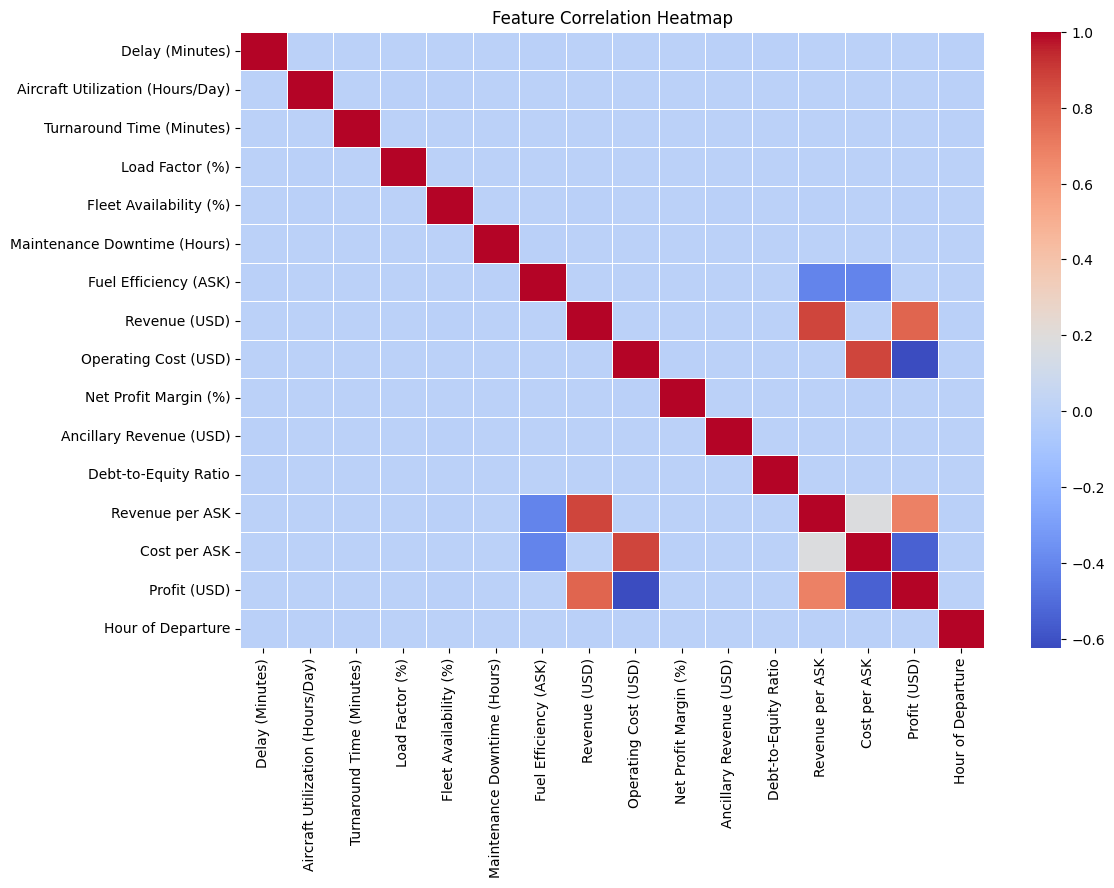

In [14]:
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Generate heatmap
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

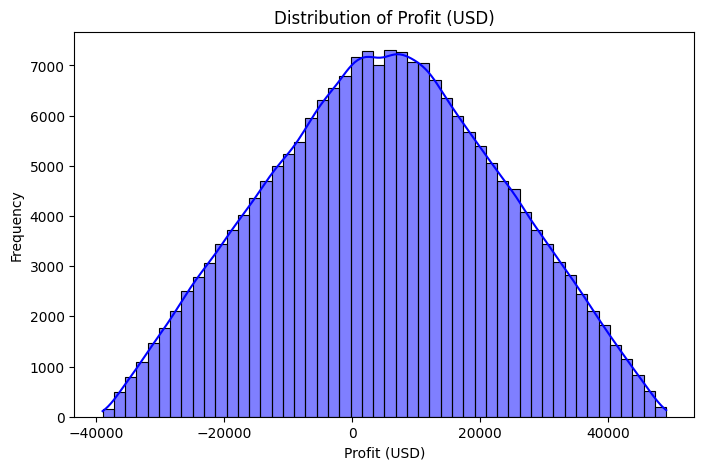

In [15]:
# Distribution of Profit (USD)
plt.figure(figsize=(8, 5))
sns.histplot(df['Profit (USD)'], bins=50, kde=True, color='blue')
plt.title("Distribution of Profit (USD)")
plt.xlabel("Profit (USD)")
plt.ylabel("Frequency")
plt.show()

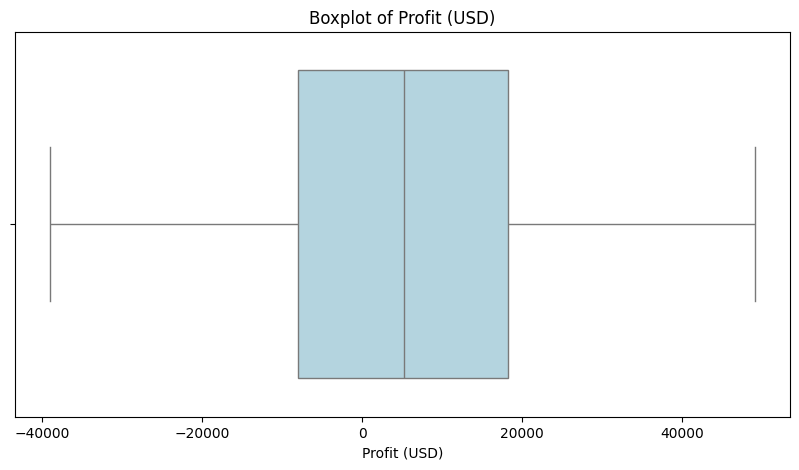

In [16]:
# Boxplot for outlier detection in Profit (USD)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Profit (USD)'], color="lightblue")
plt.title("Boxplot of Profit (USD)")
plt.xlabel("Profit (USD)")
plt.show()

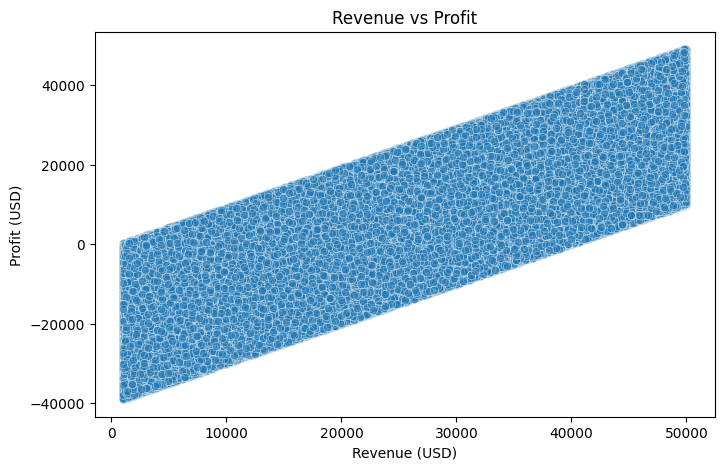

In [17]:
# Relationship between Revenue and Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Revenue (USD)'], y=df['Profit (USD)'], alpha=0.5)
plt.title("Revenue vs Profit")
plt.xlabel("Revenue (USD)")
plt.ylabel("Profit (USD)")
plt.show()

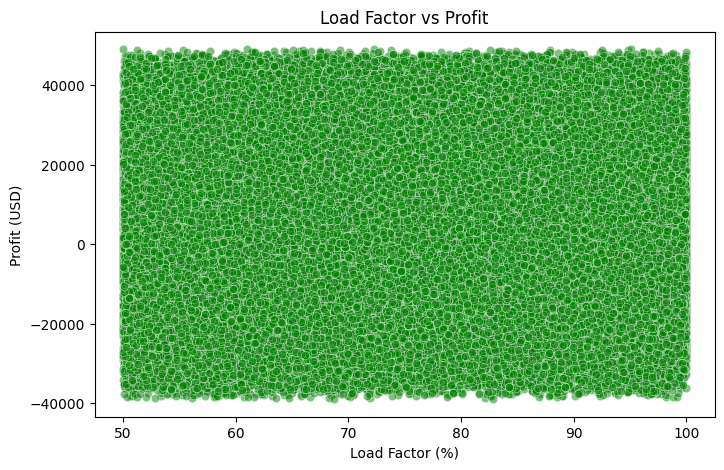

In [18]:
# Relationship between Load Factor and Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Load Factor (%)'], y=df['Profit (USD)'], alpha=0.5, color='green')
plt.title("Load Factor vs Profit")
plt.xlabel("Load Factor (%)")
plt.ylabel("Profit (USD)")
plt.show()

In [19]:
df.to_csv("clean_data.csv")